In [ ]:
# Install guribipy and import to use gurobi as a solver
%pip install -i https://pypi.gurobi.com gurobipy  

Looking in indexes: https://pypi.gurobi.com, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 13.7 MB/s 


In [ ]:
import gurobipy
from gurobipy import *
gurobipy.help()


  Gurobi shell.  Available top-level commands are:
    read(): Read a model from a file (e.g., m = read("junk.mps")
            typically followed by m.optimize())
    models(): Provide a list of the currently loaded models.
    setParam(): Change a parameter setting (e.g., setParam("NodeLimit", 10)).
    readParams(): Read parameter settings from a file.
    resetParams(): Reset parameters to their default values.
    paramHelp(): Get help on a parameter (e.g., paramHelp("NodeLimit")).
    writeParams(): Write current parameter settings to a file.
    system(): Perform a shell command (e.g., system("ls")).

  Additional help on each of these commands may be obtained by typing
  "help(command)" (e.g., help(setParam)).

  Additional commands are also available for the basic objects that are
  created and manipulated within the Gurobi optimizer.  More help on these
  commands can be obtained by typing:
    help(Model)     : the Gurobi model object
    help(Var)       : the Gurobi variab

# Assignment Problem

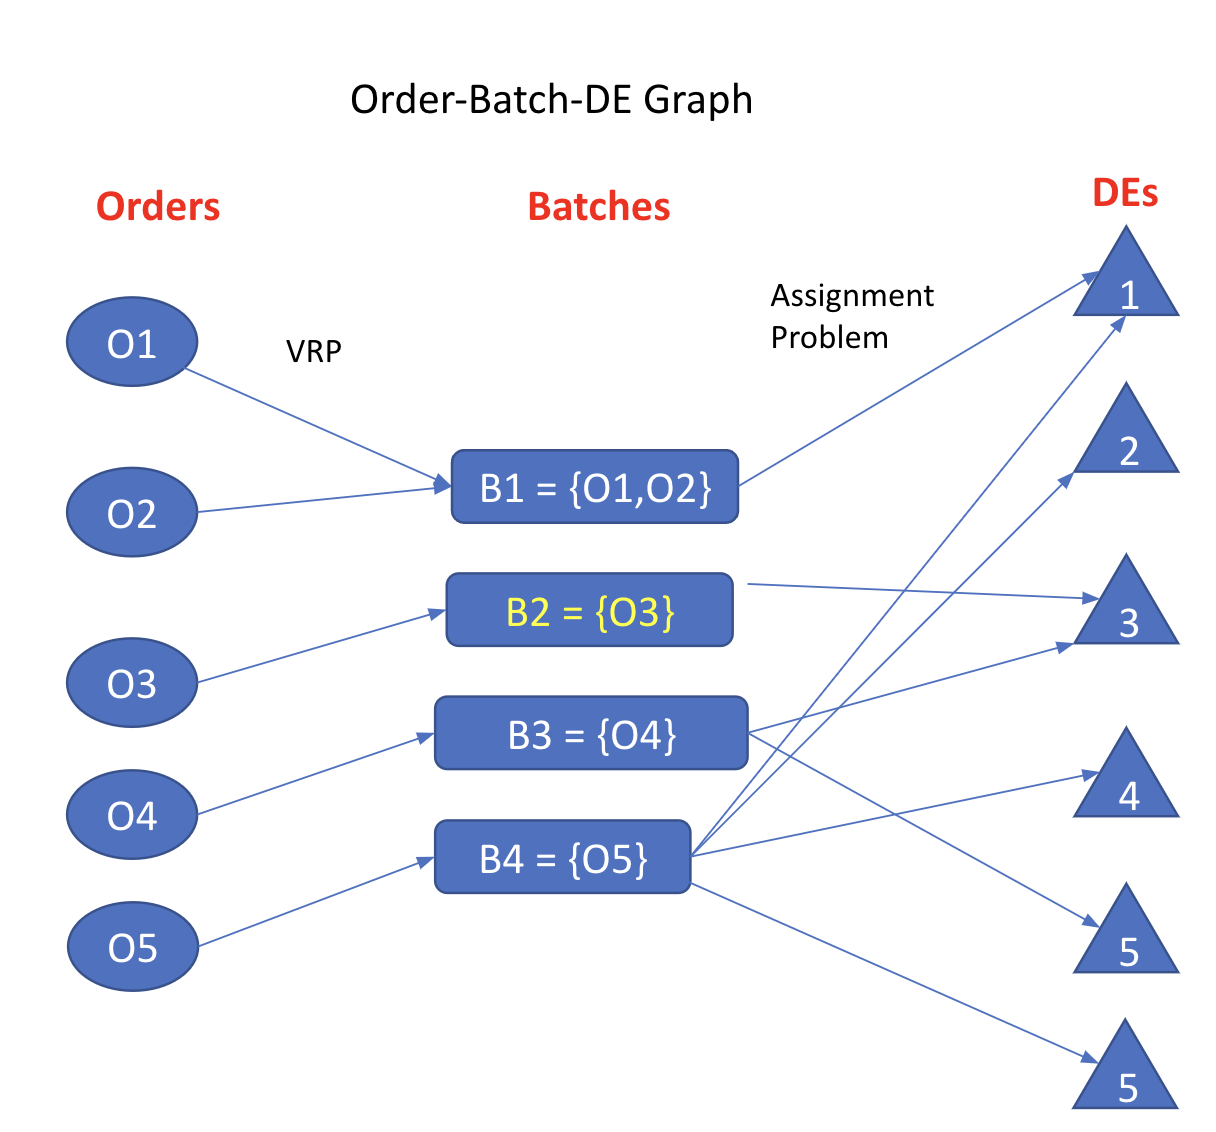

## Problem Description

In this problem, we have six DEs and five batches. One batche can be assigned to only one DE and vice-versa. There are known cost associated with each assignment. Unassigned edges are having a penalty cost.


**Objective function:**
$$ \textrm{Minimize} \sum \limits _{i,j\in A} c_{ij} \cdot x_{ij} + \sum \limits _{i\in Batches} p_{i} \cdot (1- \sum \limits _{j\in DEs} x_{ij})$$

$$ \approx \textrm{Minimize} \sum \limits _{i,j\in A} c_{ij} \cdot x_{ij} - \sum \limits _{i\in Batches} p_{i} \cdot \sum \limits _{j\in DEs} x_{ij}$$

$$ \approx \textrm{Minimize} \sum \limits _{i,j\in A} (c_{ij}-p_{i}) \cdot x_{ij} $$

**Constraints:**

$$  \sum \limits _{j\in Batches}  x_{ij} \leq 1 \forall i \in DEs \cdots (1)$$

$$  \sum \limits _{i\in DEs}  x_{ij} \leq 1 \forall j \in Batches \cdots (1)$$

$$  x_{ij} \in {0,1} \forall i,j \in A \cdots (2)$$

In [ ]:
# Create dictionaries to capture set of batches and DEs.



Batches = ['B1','B2','B3','B4']
DEs = ['D1','D2','D3','D4','D5','D6']

# Creating a dictionary of penalty costs
penalty_cost = {}
for batch_id in Batches:
  penalty_cost[batch_id] = 10000

# Create a dictionary to capture assignment costs.

arcs, cost = gurobipy.multidict({
    ('B1', 'D2'): 1.5,
    ('B1', 'D3'): 0.5,
    ('B1', 'D5'): 1.5,
    ('B1', 'D6'): 1.0,
    ('B2', 'D1'): 1.0,
    ('B2', 'D2'): 0.5,
    ('B2', 'D3'): 0.5,
    ('B2', 'D4'): 1.0,
    ('B2', 'D5'): 0.5,
    ('B3', 'D2'): 1.5,
    ('B3', 'D3'): 2.0,
    ('B3', 'D5'): 0.5,
    ('B3', 'D6'): 1.5,
    ('B4', 'D3'): 0.2,
    ('B4', 'D4'): 1.5,
    ('B4', 'D5'): 0.5,
    ('B4', 'D6'): 1.5
})

# create empty model
m = gurobipy.Model()
# add decision variables
x = m.addVars(arcs, vtype=gurobipy.GRB.BINARY, lb=0, name='x')

# set objective function
objective = gurobipy.quicksum((cost[batch_id, de_id] - penalty_cost[batch_id]) * x[batch_id, de_id] for (batch_id, de_id) in cost)

m.ModelSense = gurobipy.GRB.MINIMIZE
m.setObjective(objective)
# add constraint
Batch_constraint = m.addConstrs((gurobipy.quicksum(x.select(i, '*')) <= 1 for i in Batches), name="Batches")

DE_constraint = m.addConstrs((gurobipy.quicksum(x.select('*', j)) <= 1 for j in DEs), name="DEs")


m.setParam('MIPGap', 0.01)
# solve model
m.optimize()

# display solution
modelStatus = m.status
modelObjective = m.objval
print("=============================================")
print('model status = ',modelStatus)
print('Objective value = ',modelObjective, '\n')
###############################
# Printing & Post processing the Model Solution #
###############################
# print("=============================================")

if m.SolCount > 0:
  m.printAttr('X')
# # export model
# m.write('model1.lp')


Set parameter MIPGap to value 0.01
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 10 rows, 17 columns and 34 nonzeros
Model fingerprint: 0xa7789be4
Variable types: 0 continuous, 17 integer (17 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+04, 1e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective -39994.00000
Presolve removed 2 rows and 2 columns
Presolve time: 0.00s
Presolved: 8 rows, 15 columns, 28 nonzeros
Variable types: 0 continuous, 15 integer (15 binary)
Found heuristic solution: objective -39997.80000

Root relaxation: cutoff, 4 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0     cutoff    0      -39997.800 -39997.800